# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)


### Задача 1

В данной задаче мы продолжим работать с датасетом о диабете, с которым вы познакомились на занятии.

In [ ]:
data = load_diabetes()
X, y = data['data'], data['target']

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Реализуйте линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [ ]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        if self.fit_intercept:
          X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.n, self.d = X.shape
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ Y.reshape(-1, 1)
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        if self.fit_intercept:
          X = np.hstack((np.ones((X.shape[0], 1)), X))

        y_pred = X @ self.theta

        n, p = X.shape


        return  y_pred.flatten()

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [ ]:
MLR = MyLinearRegression()
MLR.fit(X_train, y_train)

print(f'Коэффициент с добавлением свободного члена через MLR: {MLR.theta.ravel()}')

sk_model = LinearRegression(fit_intercept=True)
sk_model.fit(X_train, y_train)
print(f'Коэффициент с добавлением свободного члена через LR: {np.hstack((sk_model.intercept_, sk_model.coef_))}')


Коэффициент с добавлением свободного члена через MLR: [ 152.14692843  -72.1794838  -246.74687429  509.74638326  346.33829369
 -876.05085754  512.7325392   193.48424893  297.9868076   727.30476833
   26.69465238]
Коэффициент с добавлением свободного члена через LR: [ 152.14692843  -72.1794838  -246.74687429  509.74638326  346.33829369
 -876.05085754  512.7325392   193.48424893  297.9868076   727.30476833
   26.69465238]


Вывод совпадает, значит, верно реализован класс MLR


Теперь обучите модель без свободного члена.

In [ ]:
MLR_no = MyLinearRegression(fit_intercept=False)
MLR_no.fit(X_train, y_train)

print(f'Коэффициент с добавлением свободного члена через MLR: {MLR_no.theta.ravel()}')

sk_model = LinearRegression(fit_intercept=False)
sk_model.fit(X_train, y_train)
print(f'Коэффициент с добавлением свободного члена через LR: {sk_model.coef_}')


Коэффициент с добавлением свободного члена через MLR: [ -72.07862586 -321.47943164  489.21159941  313.62699506 -907.24347481
  480.84778876  250.02936362  340.44813513  858.92705159   30.94878841]
Коэффициент с добавлением свободного члена через LR: [ -72.07862586 -321.47943164  489.21159941  313.62699506 -907.24347481
  480.84778876  250.02936362  340.44813513  858.92705159   30.94878841]


Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [ ]:
y_pred_with = MLR.predict(X_test)
y_pred_no = MLR_no.predict(X_test)

MSE_MLR = mean_squared_error(y_test, y_pred_with)
MSE_MLR_no = mean_squared_error(y_test, y_pred_no)

MAPE_MLR = (abs(y_test - y_pred_with) / (y_test)).mean() *100
MAPE_ML_no = (abs(y_test - y_pred_no) / (y_test)).mean() *100


print(f'C добавлением свободного члена MSE: {MSE_MLR}, MAPE: {MAPE_MLR}')
print(f'Без добавления свободного члена MSE: {MSE_MLR_no}, MAPE: {MAPE_ML_no}')

C добавлением свободного члена MSE: 3232.687250970662, MAPE: 44.45248537965561
Без добавления свободного члена MSE: 26673.811426425294, MAPE: 126.05079528261402


Сделайте выводы.

**Вывод:** 
По результам мы можем сделать вывод, что модель с добавлением свободного члена показала меньшую ошибку и меньший процент ошибки предсказания на тестовой выборке. Это говорит о лучшей способности предсказывать при наличии свободного члена.


Это происходит потому, что, если значения всех признаков нули, то свободный член учитывает сдвиг относительно нуля. Также он компенсирует ошибки измерений. То есть, в большинстве случаев нужно включать свободный член.

Больше значение MAPE во втором случае можно объяснить тем, что при отсутствии свободного члена модель не учитывает постоянную составляющую. Если целевая переменная 0, то модель не способна предсказывать значения, отличные от 0.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [ ]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(12, 6)):
    
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)   

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### **Профиль биология**

Скачайте данные <a href="https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring">`Parkinsons telemonitoring`</a>. Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [ ]:
data = pd.read_csv('parkinsons_updrs.data', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**1.** Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (паценты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [ ]:
data.drop('motor_UPDRS', axis=1, inplace=True)

X = data.drop(['total_UPDRS', 'subject#'], axis=1)
y = data['total_UPDRS']
groups = data['subject#']

Разбейте данные на обучающую и тестирующие выборки в соотношении. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы. Реализуйте разделение на тренировочную и тестовую выборки с учетом того, чтобы разные пациенты попали в разные выборки (вы моежете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например `GroupShuffleSplit`). 

**Также, выведите что-либо, подтверждающее данное свойство.**



In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2)
train_ind, test_ind = next(gss.split(X, y, groups))

X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]


test_groups = groups.iloc[test_ind]
train_groups = groups.iloc[train_ind]
print('Уникальные значения в тестовой выборке:' + str(test_groups.unique()))
print('Уникальные значения в обучающец выборке:' + str(train_groups.unique()))

Уникальные значения в тестовой выборке:[ 6 11 17 18 27 31 34 36 42]
Уникальные значения в обучающец выборке:[ 1  2  3  4  5  7  8  9 10 12 13 14 15 16 19 20 21 22 23 24 25 26 28 29
 30 32 33 35 37 38 39 40 41]


Разделяйте выборку в отношении примерно 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [ ]:
X_train_m, X_train_p, y_train_m, y_train_p = train_test_split(X_train, y_train, test_size=0.3)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Нужно приводить к одному масштабу, так как могут быть разные значения: очень большие и маленькие, тогда значения коэффициаентов могут быть существенно больше у одного,чем у другого. Тогда модель будет склонна выбирать признаки с большим масштабом. 

Это упрощвет работу с коэффициентами. Обычно вычитают среднее, делят на корень из дисперсии, это приводит к распределению с единичной дисперсией

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [ ]:
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. 

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

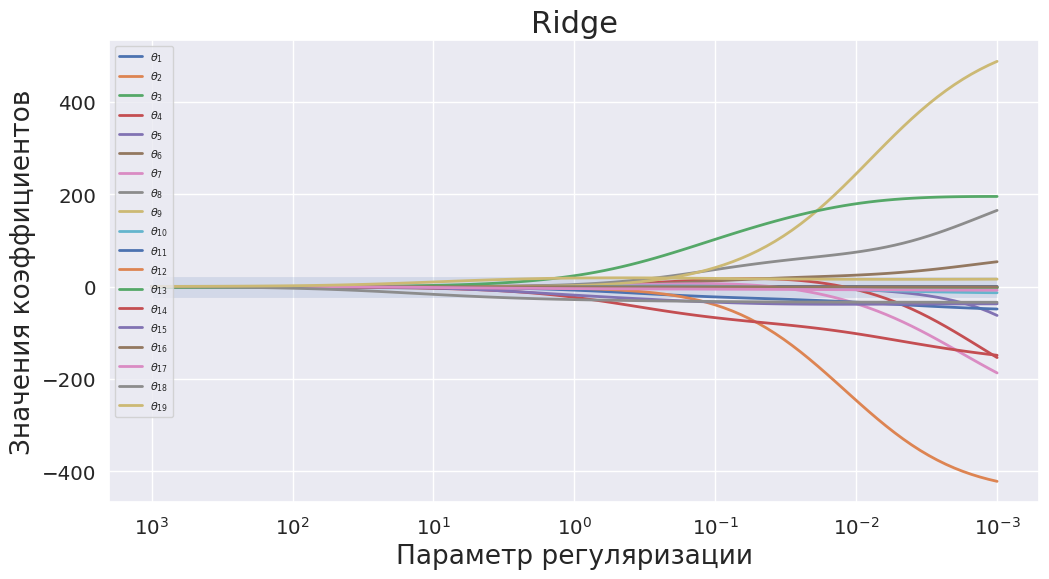

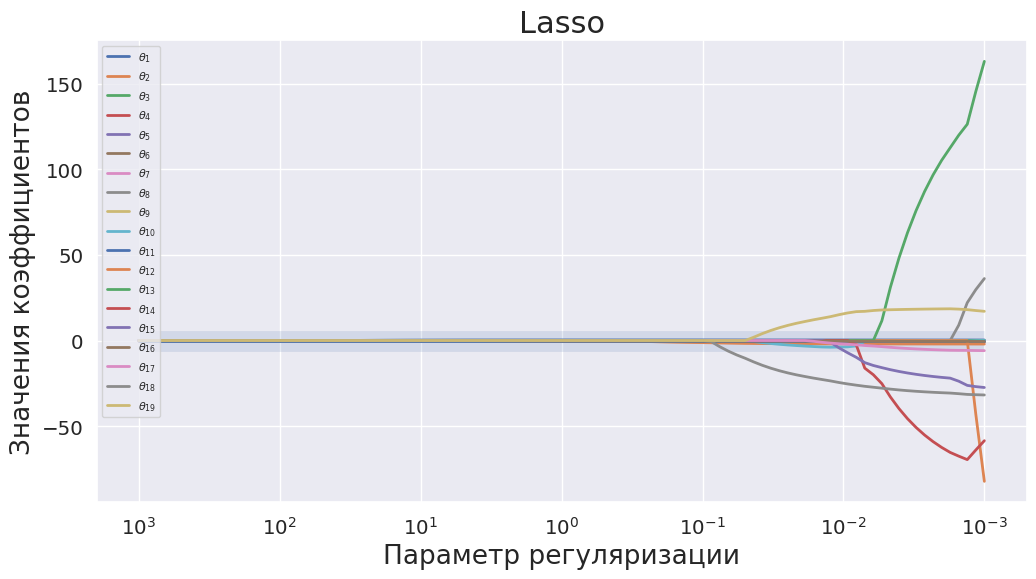

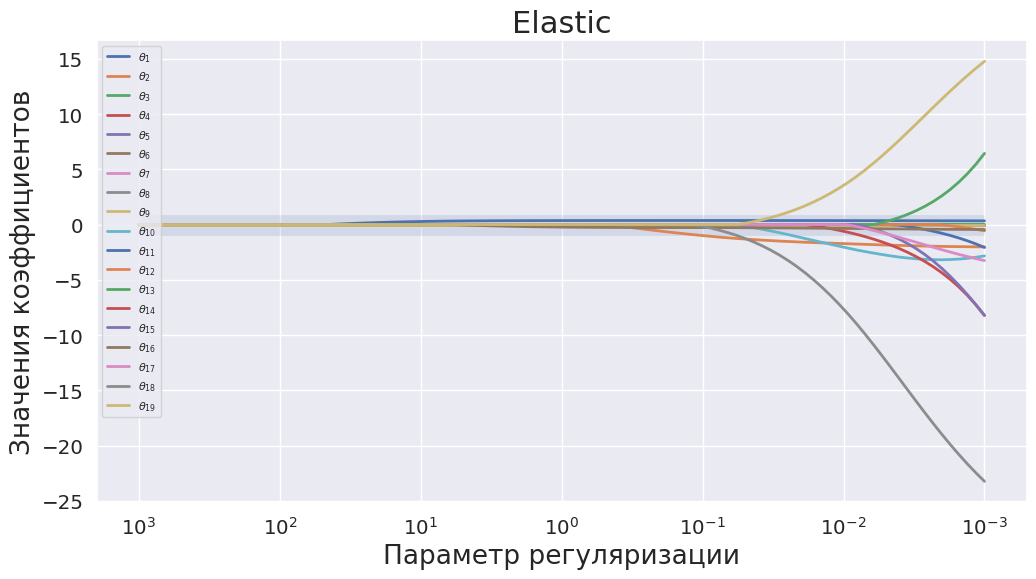

In [ ]:
r_coef = calculate_coef(Ridge(), X_train, y_train, -3, 3, 100)
draw_track(r_coef, -3, 3, 100, 'Ridge')

l_coef = calculate_coef(Lasso(), X_train, y_train, -3, 3, 100)
draw_track(l_coef, -3, 3, 100, 'Lasso')

e_coef = calculate_coef(ElasticNet(), X_train, y_train, -3, 3, 100)
draw_track(e_coef, -3, 3, 100, 'Elastic')

**Ответ:** `alpha` влияет на то, чтобы коэффициенты модель не становились слишком огромными(по абсолютному значению), что может привести к переобучению и затруднить ее. Альфа снижает риск переобучения и упрощает.


При увеличении альфа может привести к уменьшению переобучения, так как ограничтвает веса признаков. Но при слишком больших альфа модель может потерять способность приближать, поэтому нужно оптимальные значения подбирать.


По графикам видно, что при увеличении альфа некоторые коэффициенты зануляются. Значит, они не вносили существенный клад и их можно удалить из модели.




### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

In [85]:
def calculate_coef_elastic(model, X, y, lin_min, lin_max, 
               num):
    l1_ratios = np.linspace(lin_min, lin_max, num)  
    coefs = []
    for l1_ratio in l1_ratios:
      model.set_params(l1_ratio=l1_ratio)
      model.fit(X, y)
      # отбираем только первые 20 признаков для ускорения работы кода
      coefs.append(model.coef_[:20]) 
    return coefs




def draw_track_elastic(coefs, lin_min, lin_max, 
               num, title='', figsize=(12, 6)):
    
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    """

    l1_ratios = np.linspace(lin_min, lin_max, num)   

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, lin_min, lin_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(l1_ratios, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('linear')

    plt.xlabel('Значение параметра l1_ratio', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+05, tolerance: 5.458e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


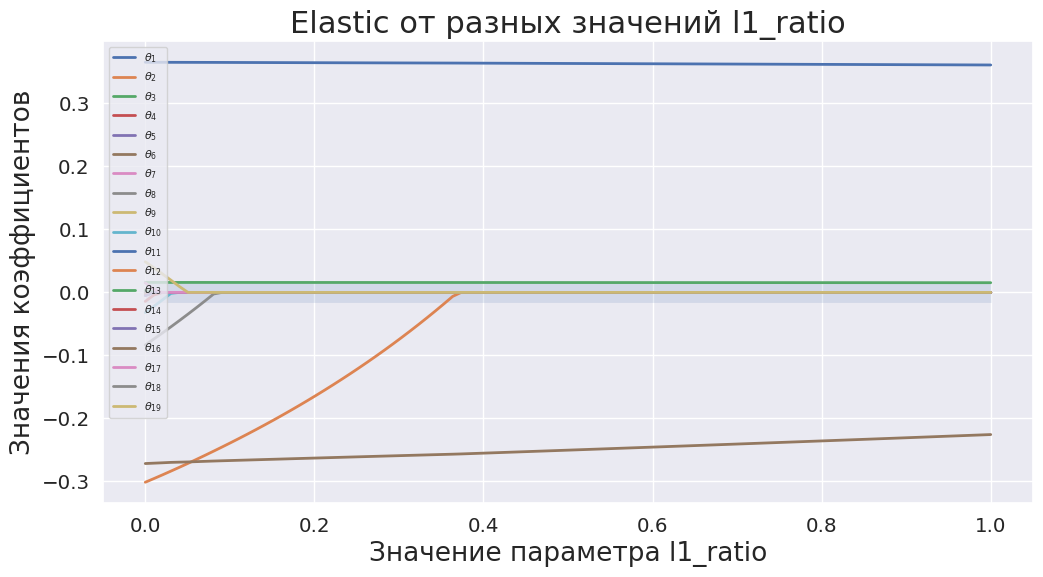

In [86]:
e_coefs = calculate_coef_elastic(ElasticNet(), X_train, y_train, 0, 1, 100)
draw_track_elastic(e_coefs, 0, 1, 100, 'Elastic от разных значений l1_ratio')

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

Можно заметить, что при увеличении l1_ratio коэффициенты признаков становятся все более нулевыми(елси эти признаки=0, можно отбросить для оптимизации модели). Это значит, что L1-регуляризации оказывает более сильное влияние на модель. 

При l1_ratio=0 используется только L2-регуляризация, при l1_ratio=1 - только L1-регуляризация. 

**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
linreg = {}
linreg['MSE'] = mean_squared_error(y_test, y_pred)
linreg['MAE'] = mean_absolute_error(y_test, y_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)

Реализуйте функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [91]:
def draw_errors(X_train, X_test, y_train, y_test, error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    error - функция, вычисляющая ошибку
    error_name - имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    alphas - массив величин alpha
    
    """
    plt.figure(figsize=(15, 6))
    ax = plt.gca()

    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet l1_ratio=0.25': ElasticNet(l1_ratio=0.25),
        'ElasticNet l1_ratio=0.5': ElasticNet(l1_ratio=0.5),
        'ElasticNet l1_ratio=0.75': ElasticNet(l1_ratio=0.75),
    }

    errors = {model_name: [] for model_name in models}

    for a in alphas:
      for name, model in models.items():
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors[name].append(error(y_test, y_pred))
    for name, errorr in errors.items():
        plt.plot(alphas, errorr, label=name)

    ax.set_xscale('log')
    ax.set_xlabel('Параметр регуляризации')
    ax.set_xlabel('Значение ошибки')
    ax.set_title(error_name)
    plt.legend()
    plt.show()


Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [83]:
alphas = np.logspace(-2, 8, 20)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


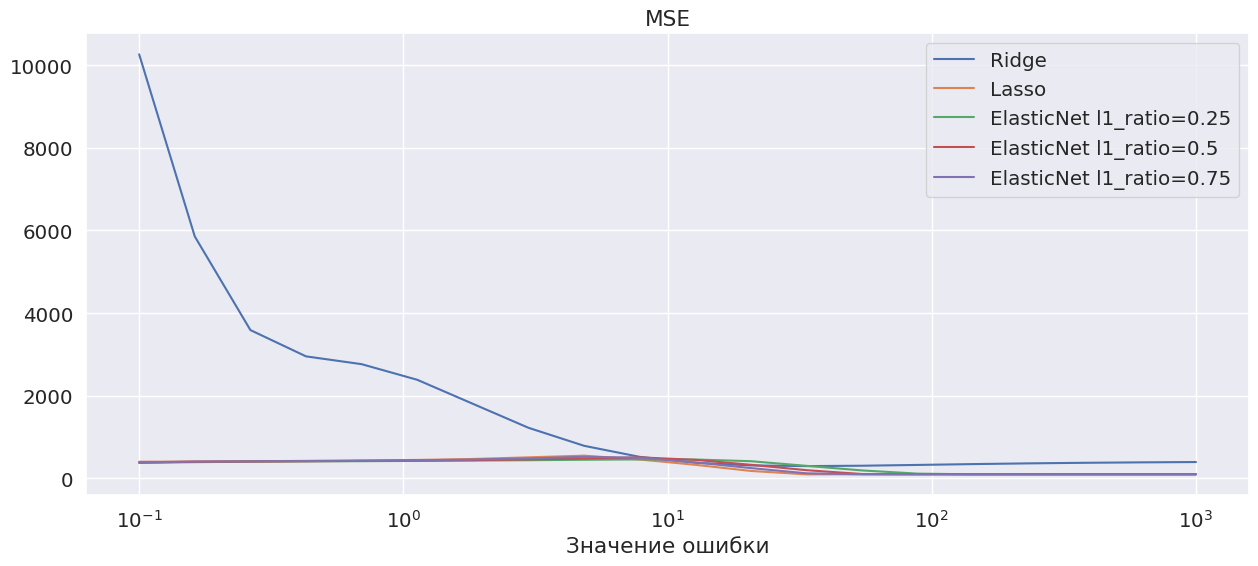

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


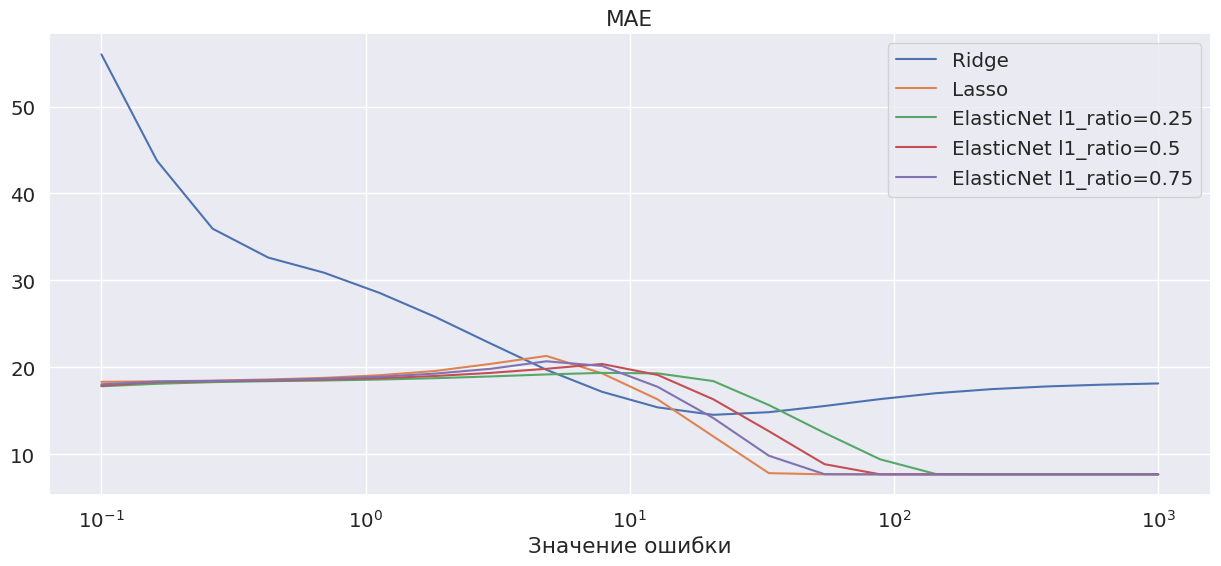

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


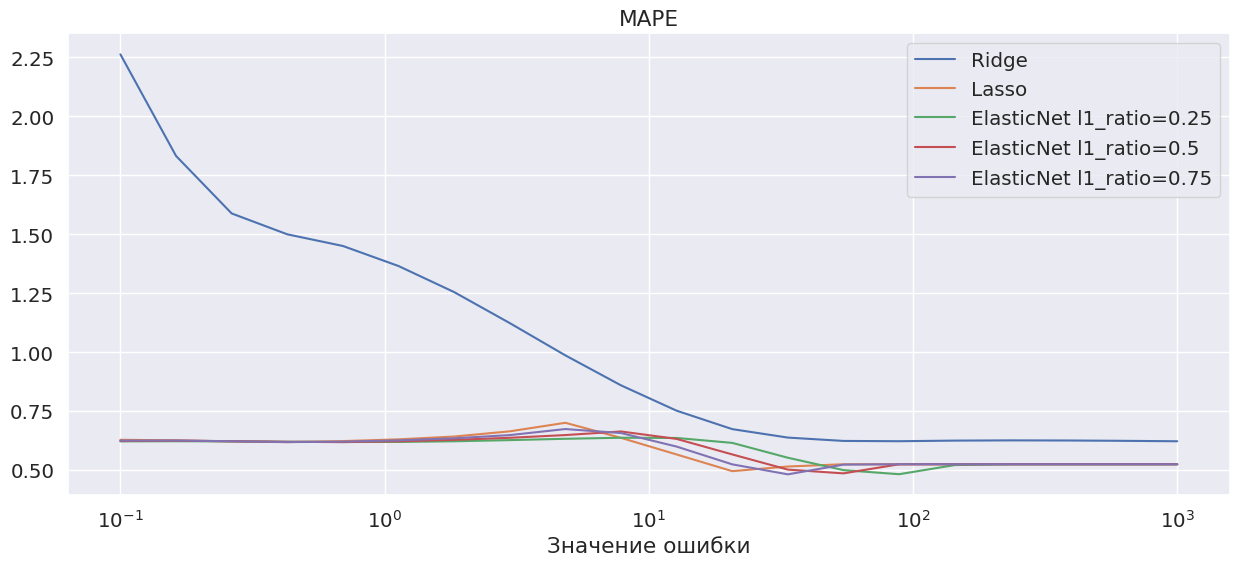

In [92]:
draw_errors(X_train, X_test, y_train, y_test,mean_squared_error, 'MSE', alphas)
draw_errors(X_train, X_test, y_train, y_test,mean_absolute_error, 'MAE', alphas)
draw_errors(X_train, X_test, y_train, y_test,mean_absolute_percentage_error, 'MAPE', alphas);

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


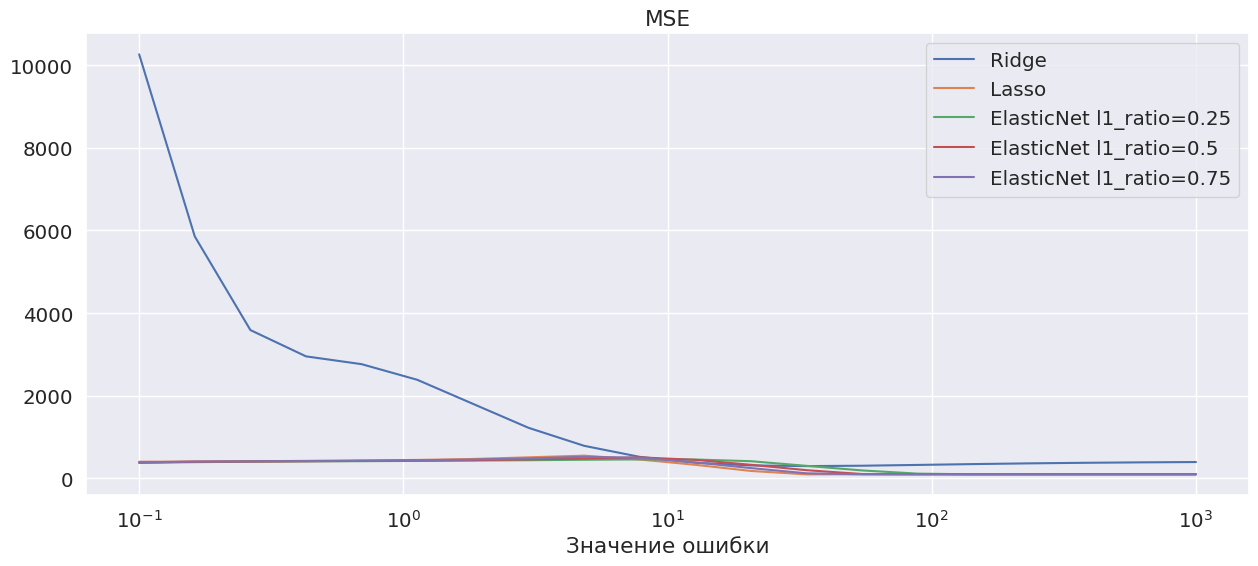

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


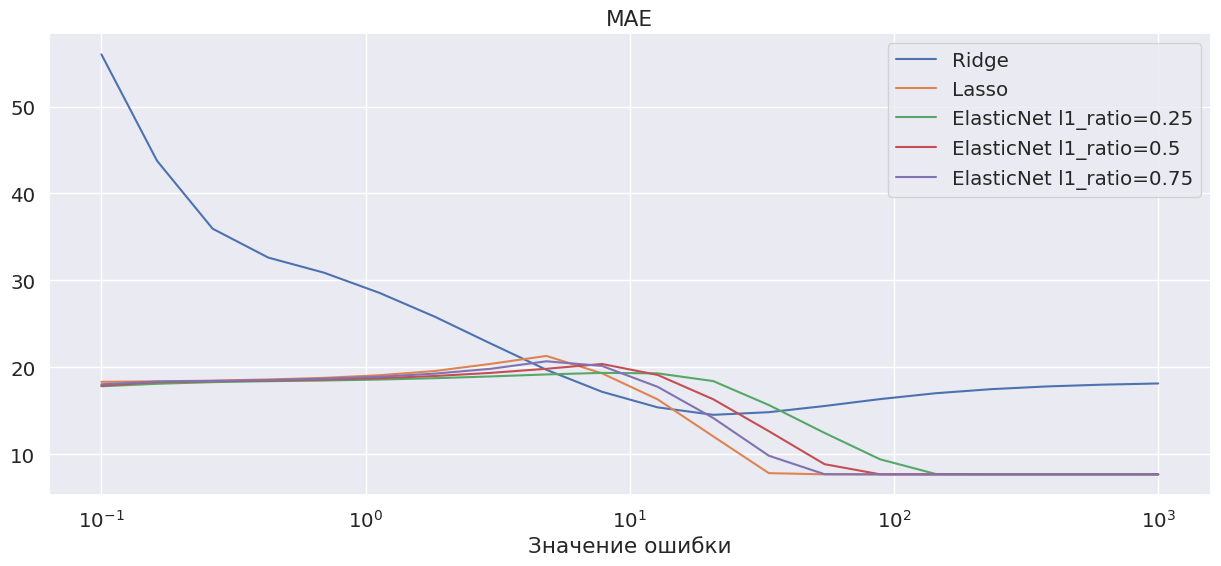

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names


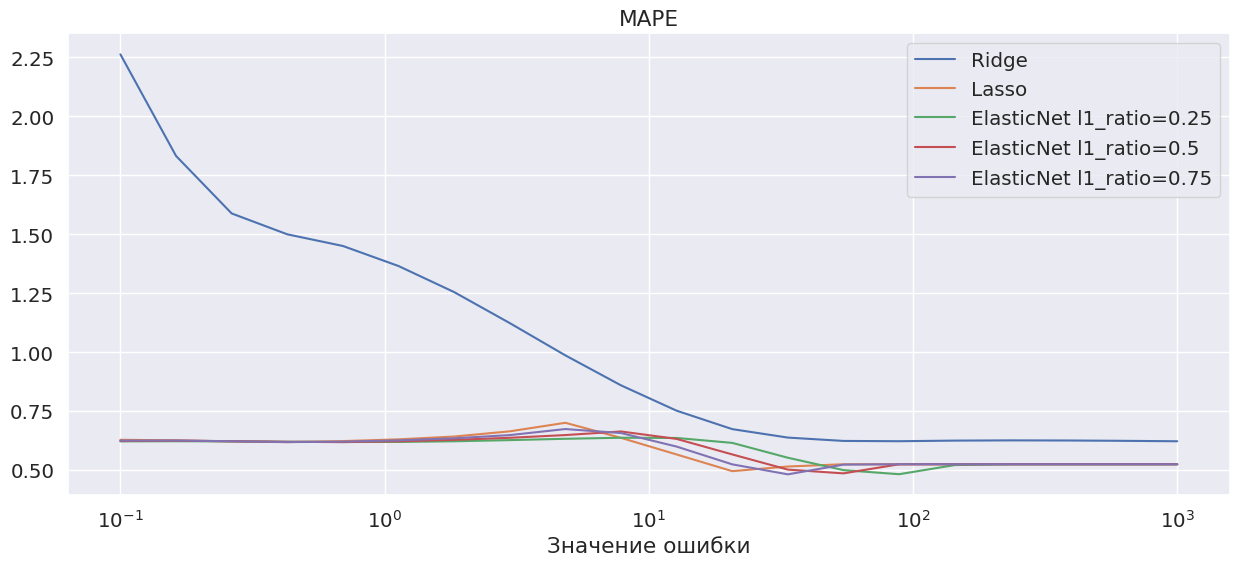

In [93]:
alphas = np.logspace(-1, 3, 20)
draw_errors(X_train, X_test, y_train, y_test, mean_squared_error, 'MSE', alphas)
draw_errors(X_train, X_test, y_train, y_test, mean_absolute_error, 'MAE', alphas)
draw_errors(X_train, X_test, y_train, y_test, mean_absolute_percentage_error, 'MAPE', alphas)

**3.** Сделайте общий вывод по задаче.

**Вывод:**  График демонстрирует, что ошибка Ridge имеет минимум в окрестности 10 на выбранном диапазоне alpha, а ошибка Lasso и ElasticNet монотонно возрастает при увеличении alpha. При этом, ElasticNet с l1_ratio=0.25 имеет меньшую скорость роста ошибки, чем Lasso и ElasticNet с l1_ratio=0.5 и 0.75. Кроме того, можно заметить, что у графиков Lasso и ElasticNet есть изгиб вблизи 10, что может свидетельствовать о наличии оптимального значения alpha в этой области.

Также отметим, что чем меньше l1_ratio, тем раньше начинается изгиб графика и тем резче он выражен. Это связано с тем, что при меньших значениях l1_ratio модель более склонна к применению L1-регуляризации, что может приводить к выбору только некоторых признаков. 





### Задача 4
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.


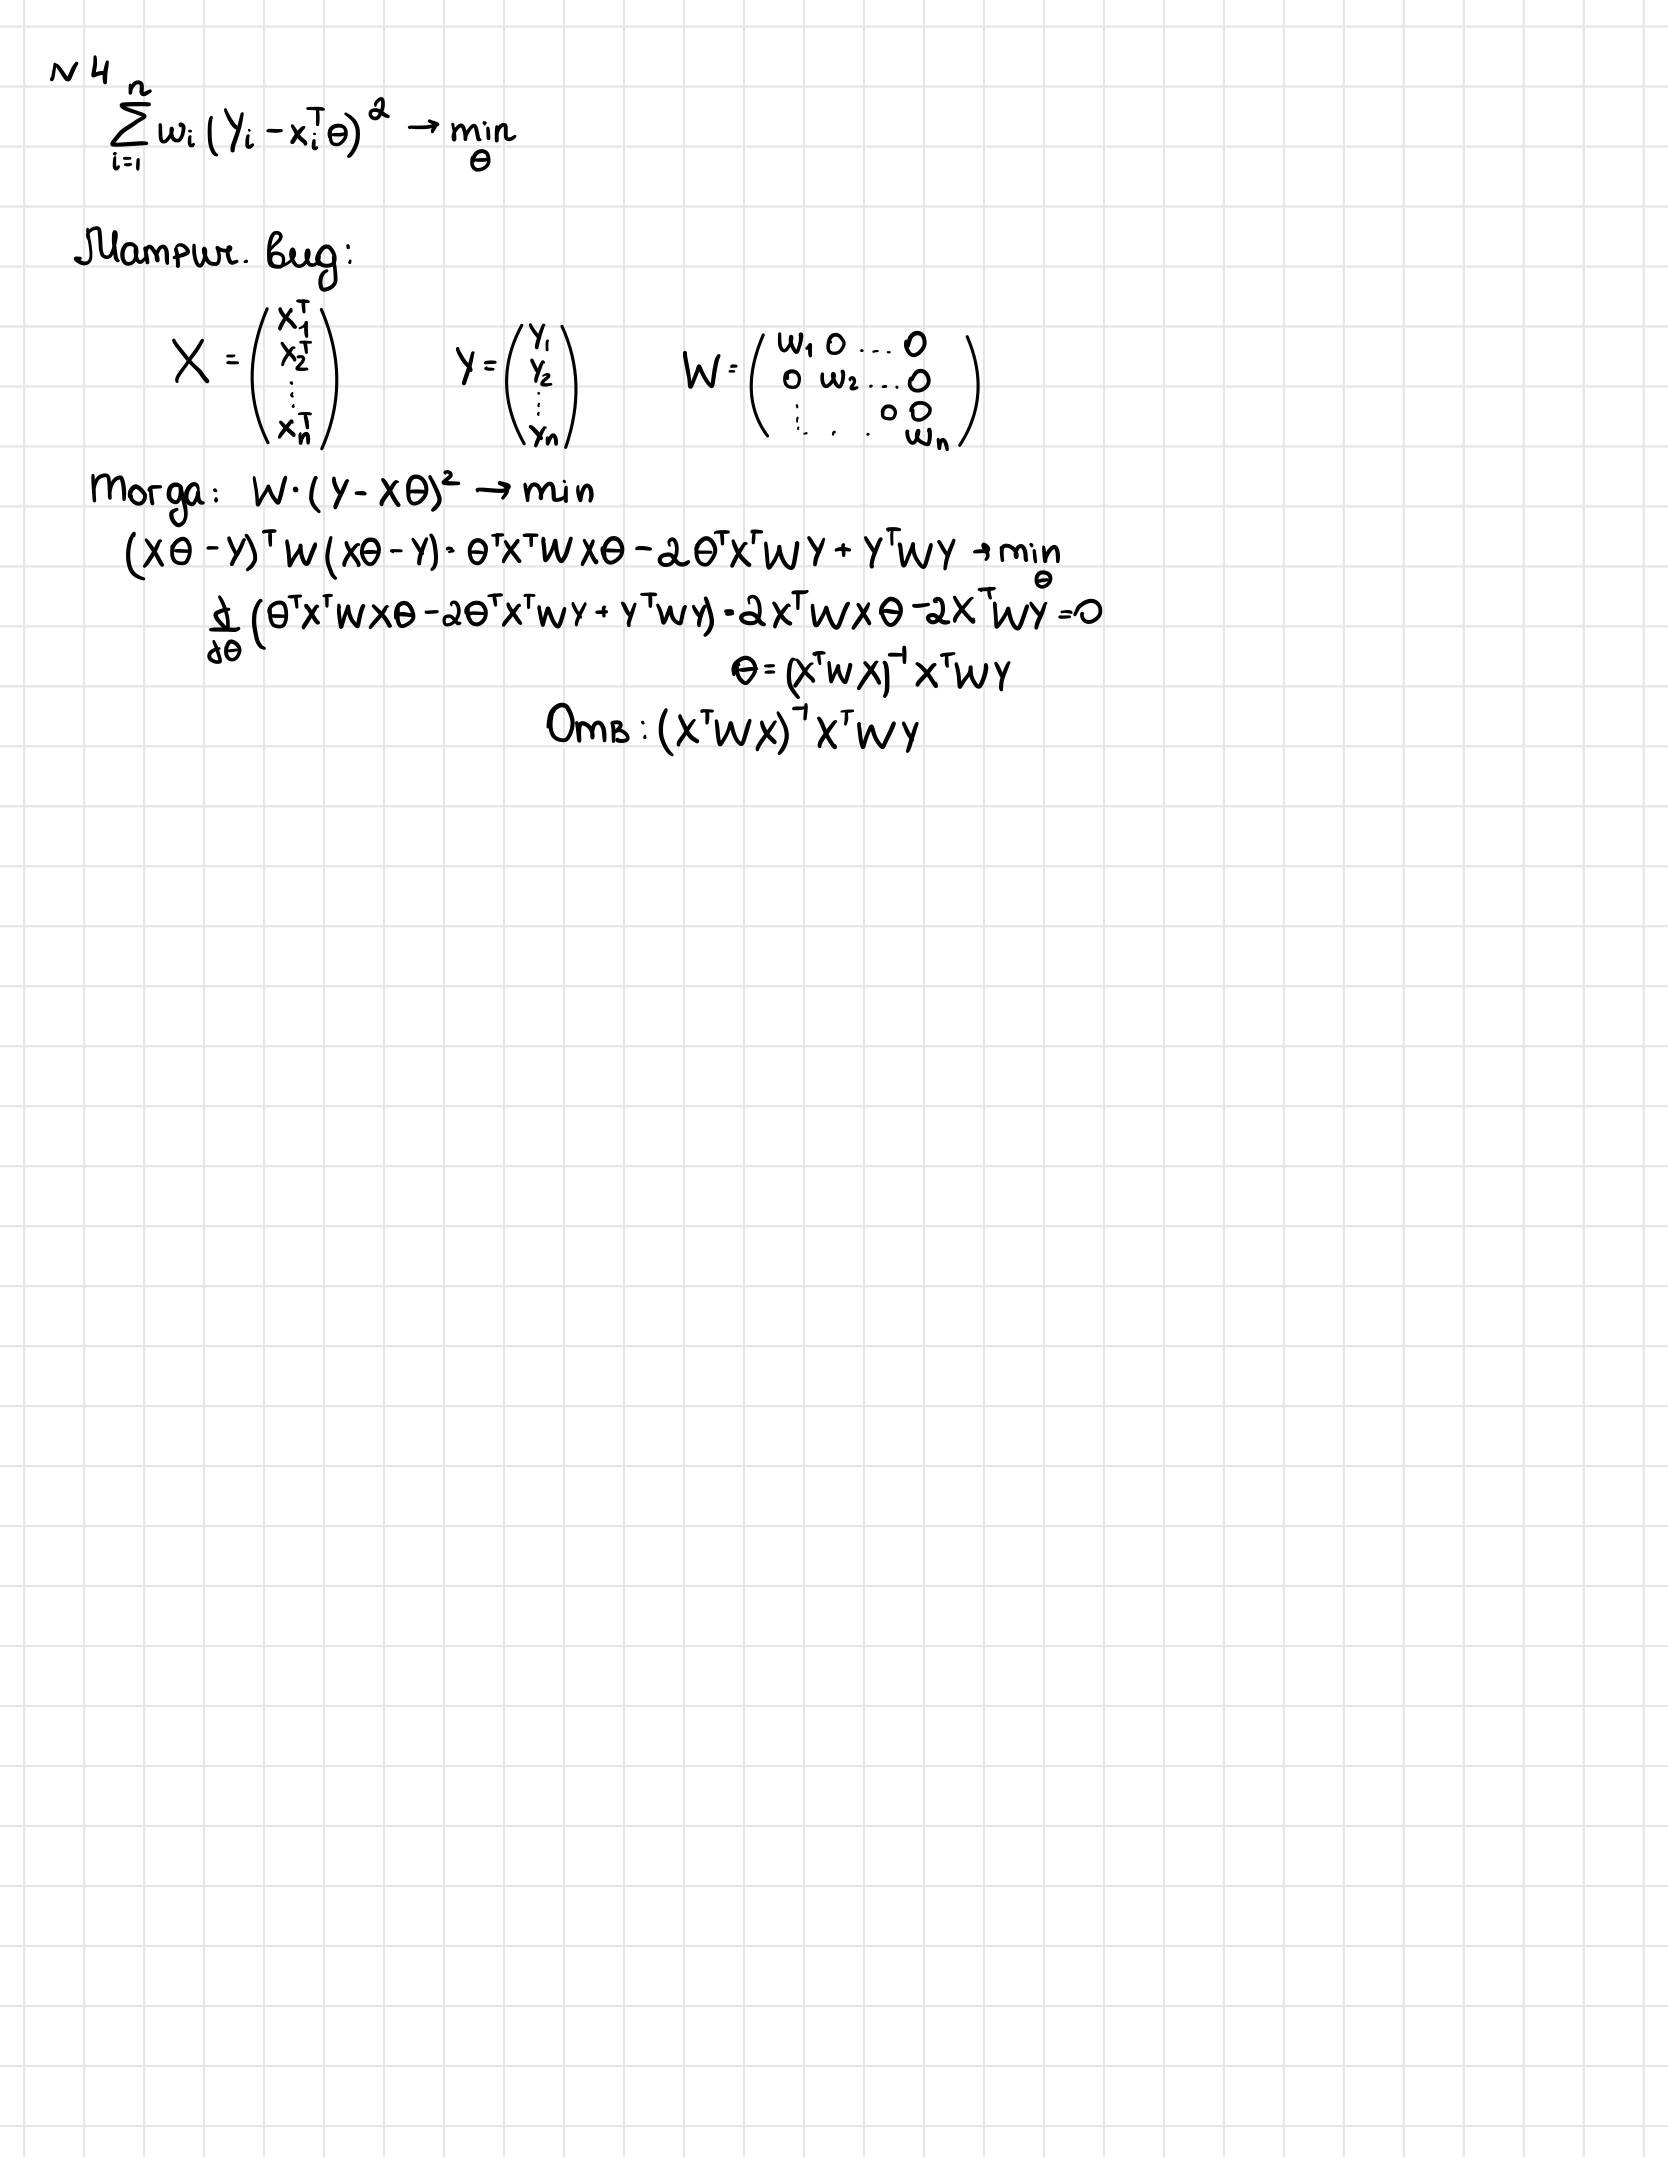